In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
data = pd.read_csv("F:\Machine Learning\ML_datas\laptopdata.csv")

In [3]:
#Analysing dataset
data.shape

(1303, 11)

In [4]:
data.head(20)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [5]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
CPU                 0
RAM                 0
Memory              0
GPU                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
## remove gb and kg from Ram and weight and convert the cols to numeric
data['RAM'] = data['RAM'].str.replace("GB", "")
data['Weight'] = data['Weight'].str.replace("kg", "")
data['RAM'] = data['RAM'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

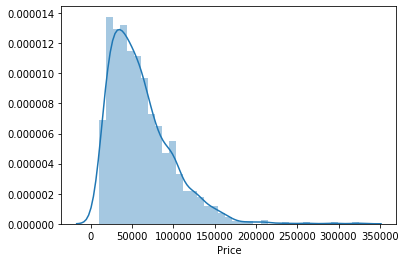

In [7]:
#Exploratory data analysis
sns.distplot(data['Price'])
plt.show()

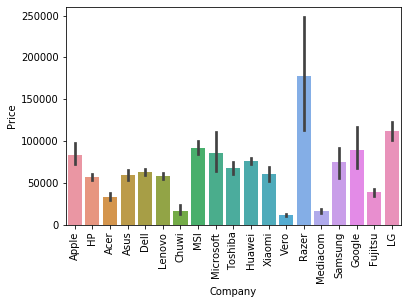

In [8]:
#what is avg price of each brand?
sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

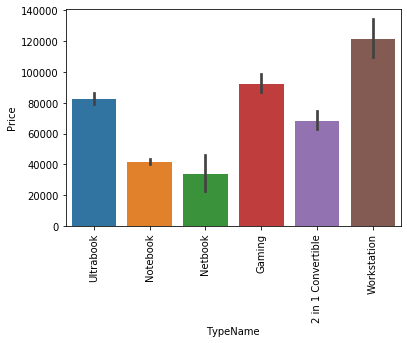

In [9]:
#price based on TypeName
data['TypeName'].value_counts().plot(kind='bar')
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

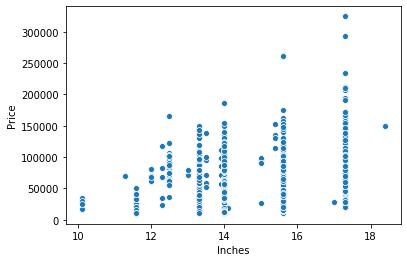

In [10]:
#price based on size
sns.scatterplot(x=data['Inches'],y=data['Price'])

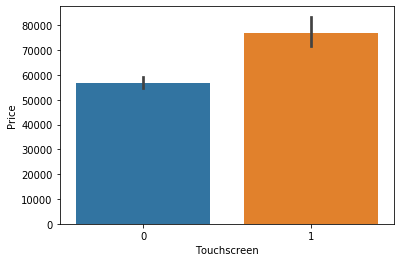

In [11]:
#adding a new feature using existing feature
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
sns.countplot(data['Touchscreen'])
sns.barplot(x=data['Touchscreen'],y=data['Price'])


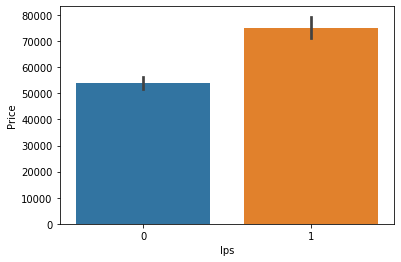

In [12]:
#extract IPS column
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['Ips'],y=data['Price'])

In [13]:
#Extract X-axis and Y-axis screen resolution dimensions
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [14]:
#Replacing inches, X and Y resolution to PPI
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
RAM            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [15]:
data.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

In [16]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
data['Cpu_brand'] = data['CPU'].apply(lambda x: fetch_processor(x))

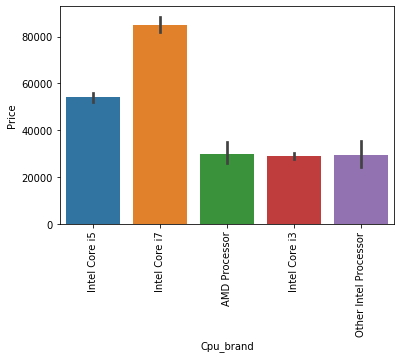

In [17]:
#price vary with processor
sns.barplot(x=data['Cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

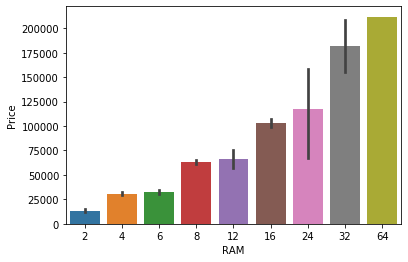

In [18]:
#price vary with RAM
sns.barplot(data['RAM'], data['Price'])
plt.show()

In [19]:
data.drop(columns=['Memory','CPU'],inplace=True)

In [20]:
# Which brand GPU is in laptop
data['Gpu_brand'] = data['GPU'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
data = data[data['Gpu_brand'] != 'ARM']
data.drop(columns=['GPU'],inplace=True)

In [21]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

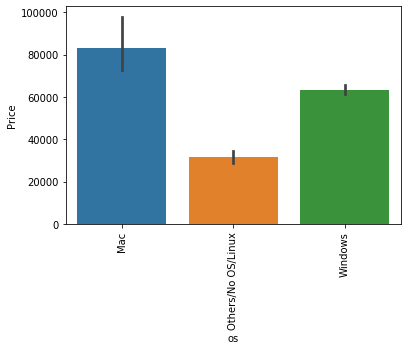

In [22]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

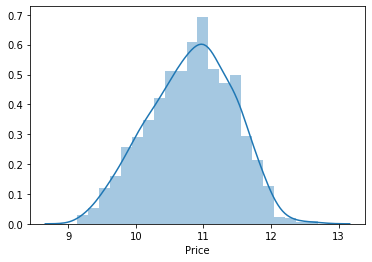

In [23]:
sns.distplot(np.log(data['Price']))
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


In [25]:
X = data.drop(columns=['Price'])

y = np.log(data['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [26]:
data.head(7)

,Company,TypeName,RAM,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac
5,Acer,Notebook,4,2.10,21312.0000,0,0,100.454670,AMD Processor,AMD,Windows
6,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,Intel Core i7,Intel,Mac


In [30]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=15)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811802606147323
MAE 0.15770367594145177
